In [22]:
import cv2
import skimage
from skimage.io import imread
from skimage.io import imshow
%matplotlib inline

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


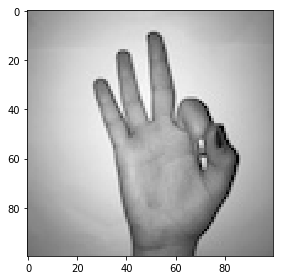

In [45]:
img = cv2.imread('example_9.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow(img)
imshow(img_gray)


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


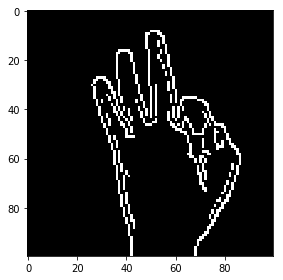

In [46]:
edges = cv2.Canny(img_gray,100,200)
ret,thresh = cv2.threshold(edges,150,255,cv2.THRESH_BINARY)

imshow(thresh)


In [47]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 1)
binary=np.logical_not((dilation<0.5))
dilation[99,:]=1
filled_I = binary_fill_holes(dilation)
filled_I[99,:]=0
filled_I = filled_I*1

In [54]:
im2,contours,h= cv2.findContours(filled_I,2,1)
cnt = contours[0]
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


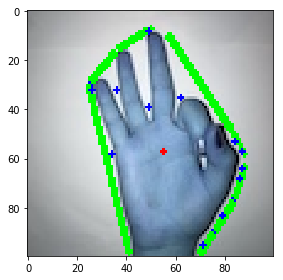

In [55]:
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,1,[0,0,255],-1)
#     print(far)
imshow(img)

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


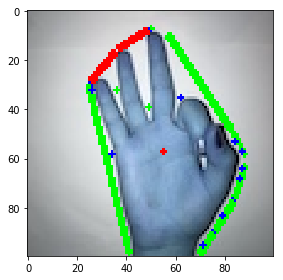

In [57]:
import math
count_defects = 0
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    
    # find length of all sides of triangle
    a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
    b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
    c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)

    # apply cosine rule here
    angle = math.acos((b**2 + c**2 - a**2)/(2*b*c)) * 57
    # ignore angles > 90 and highlight rest with red dots
    if angle <= 90:
        count_defects += 1
        cv2.circle(img, far, 1, [0,255,0], -1)
        #dist = cv2.pointPolygonTest(cnt,far,True)

        # draw a line from start to end i.e. the convex points (finger tips)
        # (can skip this part)
        cv2.line(img,start, end, [255,0,0], 2)
        #cv2.circle(crop_img,far,5,[0,0,255],-1)
M = cv2.moments(cnt)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])
cv2.circle(img,(cx,cy),1,[255,0,0],-1)
# cv2.Line(img,(cx,cy),1,[255,0,0],-1)
imshow(img)


In [58]:
# define actions required
if count_defects == 1:
    print("222222222")
elif count_defects == 2:
    print("333333333")
elif count_defects == 3:
    print("444444444")
elif count_defects == 4:
    print("555555555")
else:
    print("1 or 0")

333333333
